In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# import model algorithms
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis ,gaussian_process
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import scipy as sc

#import model helper functions
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn import feature_selection, model_selection, metrics

# visualization 
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
%matplotlib inline

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [45]:
train_raw = pd.read_csv("/kaggle/input/titanic/train.csv")
test_raw = pd.read_csv("/kaggle/input/titanic/test.csv")

train = train_raw.copy(deep = False)
test = test_raw.copy(deep = False)


In [46]:
train_raw.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [47]:
print(train.info())
# as we can see, only Age and Cabin has null values, we now have to figure out on how to handel such cases since null values are not handeled well while modeling the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [48]:
# lets have a look at the data
train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [49]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smart, Mr. John Montgomery",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [50]:
print("TRAIN SET")
print(train.isnull().sum())
print("TEST SET")
print(test.isnull().sum())
# to summaries :
# train data set has null values in Cabin , Age, Embarked
# test data set has null values in Age, Fare , Cabin 

TRAIN SET
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
TEST SET
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [51]:
# cleanup of both train and test dataset

# We can handle the null values in age by populating with avg
# For the null values in embarked, we can populate with mode 
# For the null values in Fare , we can populate with avg

#update null values
data_full = [train , test]
for data_set in data_full:
    # distributing age with in the range of 1 std
    avg_age = data_set['Age'].mean()
    std_age = data_set['Age'].std()
    null_age_count = data_set['Age'].isnull().sum()
    null_dataset = np.random.randint(avg_age - std_age,avg_age + std_age , size = null_age_count)
    data_set['Age'].loc[data_set['Age'].isnull()] = null_dataset
    # updating null values with mode
    data_set['Embarked'].fillna(data_set['Embarked'].mode()[0], inplace = True)
    # updating 1 null value with avg
    data_set['Fare'].fillna(data_set['Fare'].mean(), inplace = True)
    
#dropping  Ticket since they do not add to the chances of a passenger's survival
#dropping Cabin, due to the sheer number of null values in the column

for data_set in data_full:
    data_set.drop(['Cabin'],axis = 1, inplace = True )
    data_set.drop(['Ticket'],axis = 1, inplace = True )
    
    
print("train set \n",train.info())
print("test set \n",test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
train set 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    objec

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [52]:
# Feature engineering for test and train data set 

for data_set in data_full :
    # extract features
    # calculate family size
    data_set['FamilySize'] = data_set['SibSp'] + data_set['Parch'] + 1 # including the passanger itself
    data_set['IsAlone'] = 1 # initialize column to 1
    data_set['IsAlone'].loc[data_set['FamilySize'] > 1 ] = 0
    # extract title from name
    data_set['Title'] = data_set['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    
    title_bool = (data_set['Title'].value_counts() < 10) 
    data_set['Title'] = data_set['Title'].apply(lambda x:'Misc'if title_bool.loc[x] == True else x)   # set title as misc for less than 10 occurances 
    
    # create bins for countinuous values
    data_set['AgeBin'] = pd.qcut(data_set['Age'],5  )
    data_set['FareBin'] = pd.qcut(data_set['Fare'],4)
    
    #one hot encoding
    data_set['SexCode'] = data_set['Sex'].map({'female':0, 'male':1}).astype(int)
    data_set['TitleCode'] = data_set['Title'].map({'Mrs':0,'Mr':1, 'Master':2,'Miss':3,'Misc':4}).astype(int)
    data_set['EmbarkedCode'] = data_set['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [53]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin,SexCode,TitleCode,EmbarkedCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(19.0, 25.0]","(-0.001, 7.91]",1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(32.0, 40.0]","(31.0, 512.329]",0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(25.0, 32.0]","(7.91, 14.454]",0,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(32.0, 40.0]","(31.0, 512.329]",0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(32.0, 40.0]","(7.91, 14.454]",1,1,0
5,6,0,3,"Moran, Mr. James",male,16.0,0,0,8.4583,Q,1,1,Mr,"(0.419, 19.0]","(7.91, 14.454]",1,1,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,1,Mr,"(40.0, 80.0]","(31.0, 512.329]",1,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,0,Master,"(0.419, 19.0]","(14.454, 31.0]",1,2,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,0,Mrs,"(25.0, 32.0]","(7.91, 14.454]",0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,0,Mrs,"(0.419, 19.0]","(14.454, 31.0]",0,0,1


In [54]:
# encode the bins
label = LabelEncoder()
for data_set in data_full:
    data_set['AgeBinCode'] = label.fit_transform(data_set['AgeBin'])
    data_set['FareBinCode'] = label.fit_transform(data_set['FareBin'])

In [55]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin,SexCode,TitleCode,EmbarkedCode,AgeBinCode,FareBinCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(19.0, 25.0]","(-0.001, 7.91]",1,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(32.0, 40.0]","(31.0, 512.329]",0,0,1,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(25.0, 32.0]","(7.91, 14.454]",0,3,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(32.0, 40.0]","(31.0, 512.329]",0,0,0,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(32.0, 40.0]","(7.91, 14.454]",1,1,0,3,1


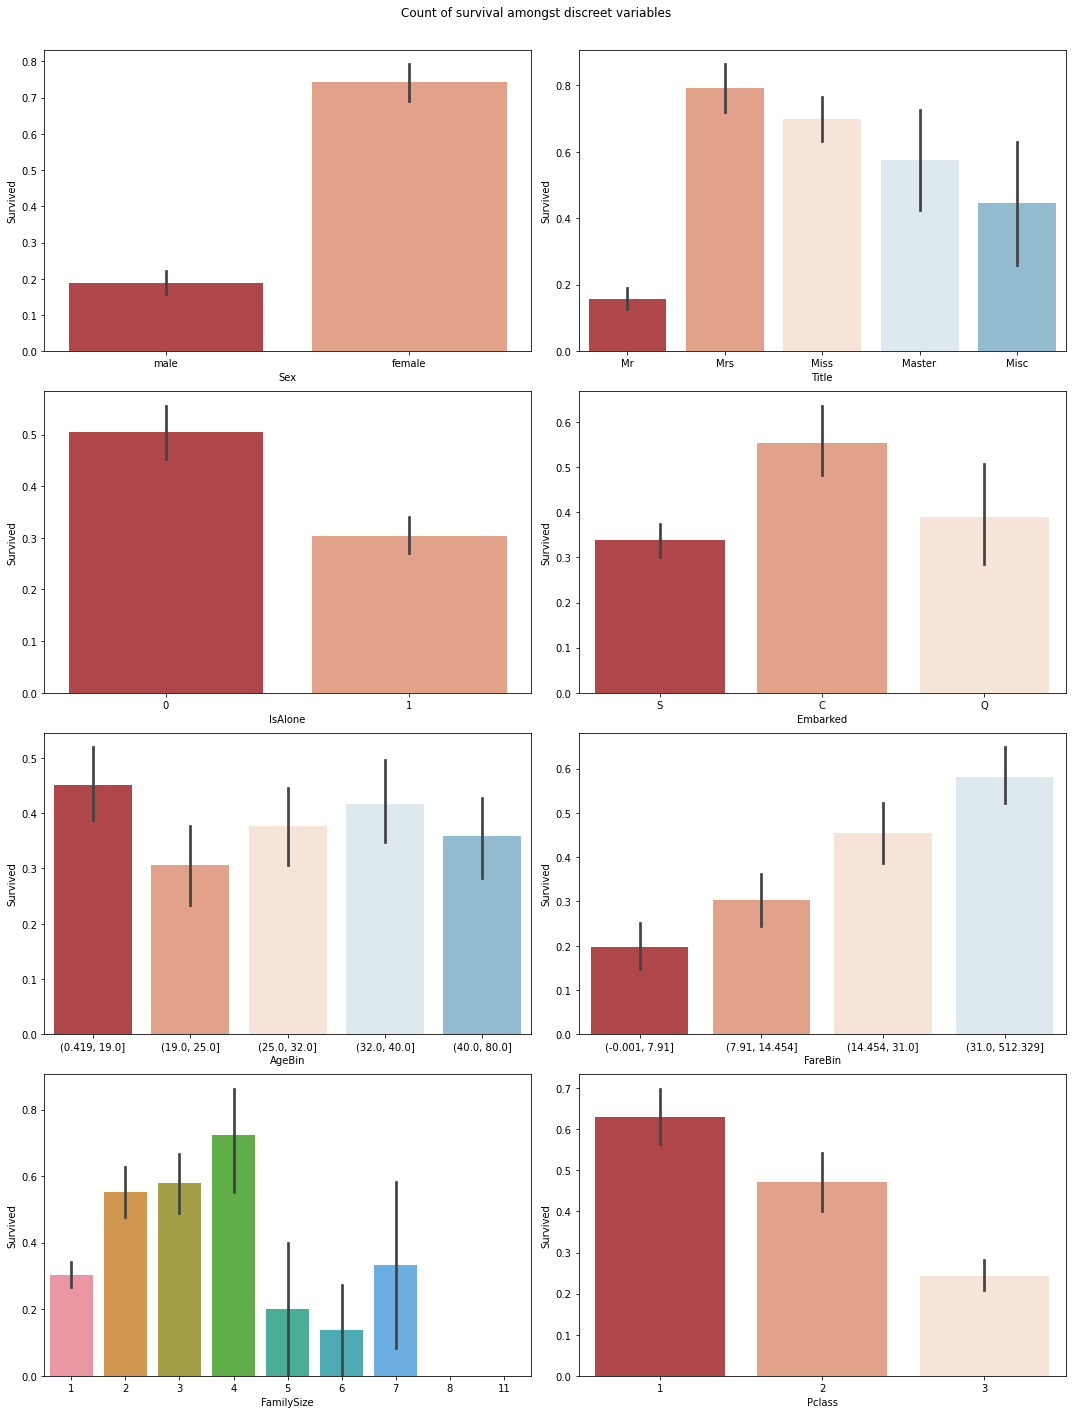

In [56]:
# exploratory analysis
# Categorical data

fig, ax = plt.subplots(4,2, figsize = (15,20))

# by sex
sns.set_palette("RdBu")
sns.barplot( x = 'Sex' , y = 'Survived', data = train, ax = ax[0][0])
# by title
sns.barplot( x = 'Title', y = 'Survived', data = train , ax = ax[0][1])
# by is alone
sns.barplot( x = 'IsAlone', y = 'Survived', data = train , ax = ax[1][0])
# by Embarked 
sns.barplot( x = 'Embarked', y = 'Survived', data = train , ax = ax[1][1])
# by age bin
sns.barplot( x = 'AgeBin', y = 'Survived', data = train , ax = ax[2][0])
# by fare bin
sns.barplot( x = 'FareBin', y = 'Survived', data = train , ax = ax[2][1])
# by Family size
sns.barplot( x = 'FamilySize', y = 'Survived', data = train , ax = ax[3][0])
# by Pclass
sns.barplot( x = 'Pclass', y = 'Survived', data = train , ax = ax[3][1])
#fig.delaxes(ax[3][1])
fig.suptitle("Count of survival amongst discreet variables")
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()



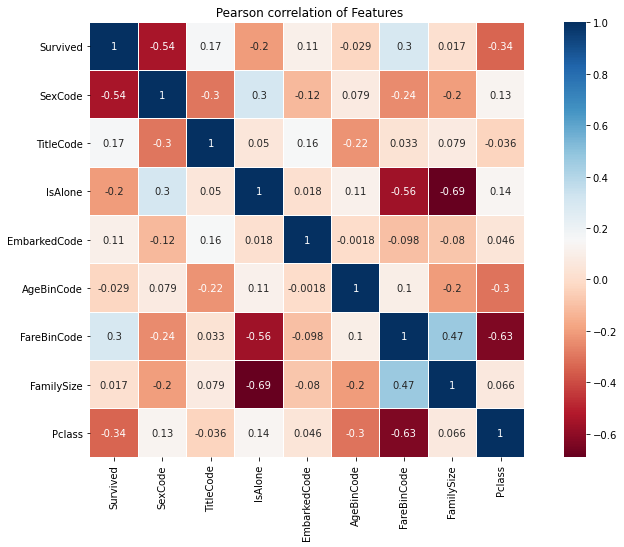

In [57]:
# Visualizing correlation

train_vis = train[['Survived','SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']]
colormap = plt.cm.RdBu
plt.figure(figsize = (14,8))
plt.title(' Pearson correlation of Features')
sns.heatmap(train_vis.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


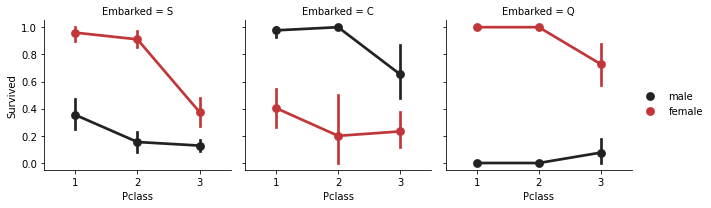

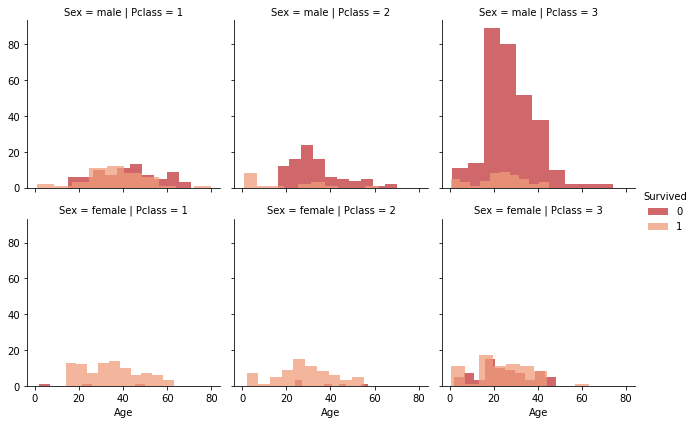

In [58]:
# visualising features together 

vis = sns.FacetGrid(train, col = 'Embarked')
vis.map(sns.pointplot, 'Pclass',  'Survived', 'Sex')
#vis.map(sns.pointplot)
vis.add_legend()

h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()



In [59]:
# created train set, dev test set
# selecting the calculated features
X = train[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']]
Y = train['Survived']



In [60]:

X = train[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']]
Y = train['Survived']
print(Y.shape)
print(X.shape)



(891,)
(891, 8)


In [61]:
X = train[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']]
X.shape

(891, 8)

In [62]:
Y = train['Survived']
Y.shape

(891,)

In [63]:
MLA = [SVC(), neighbors.KNeighborsClassifier(n_neighbors = 4), naive_bayes.GaussianNB(),tree.DecisionTreeClassifier(),  ensemble.RandomForestClassifier(), ensemble.AdaBoostClassifier(), ensemble.GradientBoostingClassifier(), XGBClassifier() ]

MLA_columns = ['MLA_Name','MLA_Train_Acc ','MLA_Test_Acc']
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
MLA_predict = train['Survived']
for alg in MLA :
    MLA_compare.loc[row_index, 'MLA_Name'] = MLA_name = alg.__class__.__name__
    cv_result = model_selection.cross_validate(alg,train[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']],train['Survived'],cv= 10, return_train_score  = True)
    MLA_compare.loc[row_index,'MLA_Train_Acc'] = cv_result['train_score'].mean()
    MLA_compare.loc[row_index,'MLA_Test_Acc'] = cv_result['test_score'].mean()
    row_index = row_index + 1
    alg.fit(train[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']],train['Survived'])
    MLA_predict[MLA_name] = alg.predict(X)
    
MLA_compare         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MLA_Name,MLA_Train_Acc,MLA_Test_Acc,MLA_Train_Acc
0,SVC,NaN,0.819301,0.827160
1,KNeighborsClassifier,NaN,0.807041,0.855594
2,GaussianNB,NaN,0.775593,0.777778
3,DecisionTreeClassifier,NaN,0.814894,0.904228
4,RandomForestClassifier,NaN,0.819376,0.904228
5,AdaBoostClassifier,NaN,0.818177,0.825540
6,GradientBoostingClassifier,NaN,0.817116,0.860956
7,XGBClassifier,NaN,0.826105,0.900736


Text(0.5, 1.0, 'ML Algorithm accuracy ratio')

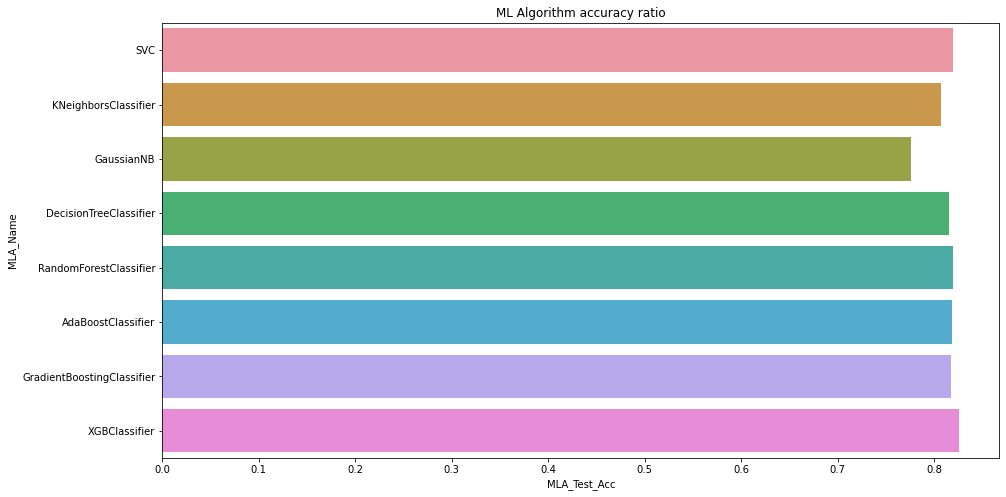

In [64]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'MLA_Test_Acc', y = 'MLA_Name', data = MLA_compare)
plt.title('ML Algorithm accuracy ratio')


In [65]:
# taking our top 5 best performing models and combining them for prediction file
models = [('svc',SVC()),('rf',ensemble.RandomForestClassifier()),('ada',ensemble.AdaBoostClassifier()),('gb',ensemble.GradientBoostingClassifier()),('xgb',XGBClassifier())]

vote_hard = ensemble.VotingClassifier(estimators = models, voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard,train[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']],train['Survived'], cv = 10 , return_train_score = True )
vote_hard.fit(train[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']],train['Survived'])
print("test score: ",vote_hard_cv['test_score'].mean())

print("train score:",vote_hard_cv['train_score'].mean())

test score:  0.8317103620474408
train score: 0.8741742709393806


In [72]:

test[['Survived']] = vote_hard.predict(test[['SexCode','TitleCode','IsAlone','EmbarkedCode','AgeBinCode','FareBinCode','FamilySize','Pclass']])

submission_df = test[['PassengerId', 'Survived']]
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
submission_df.to_csv("../working/submit.csv",index = False)